In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv('C:\\Users\\Sara\\rep\\kaggle\\housing_prices\\train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Plotting raw data

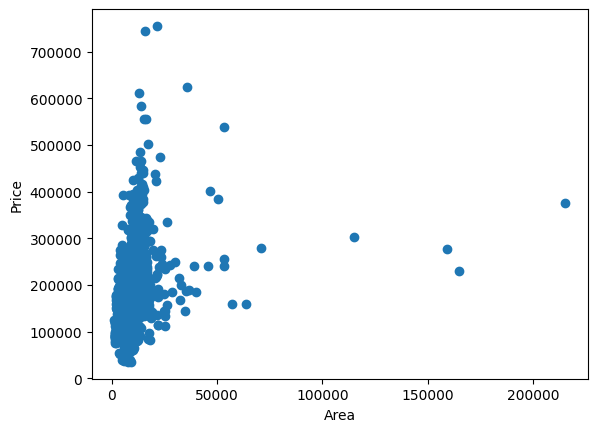

In [5]:
plt.scatter(df['LotArea'], df['SalePrice'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

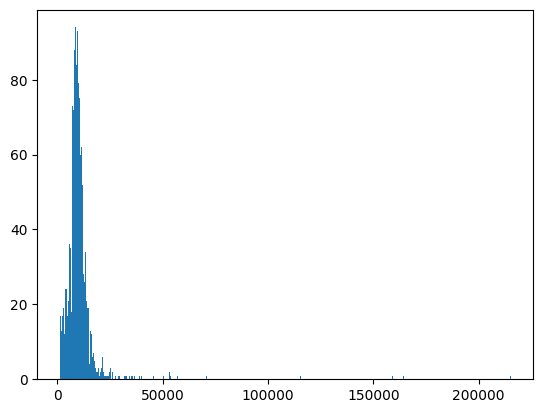

In [6]:
plt.hist(df['LotArea'],bins=500)
plt.show()

It makes sense to exclude the outliers that exhibit very large lot area but low price

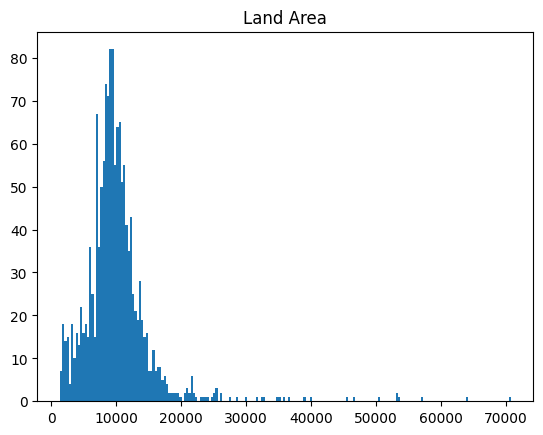

In [7]:
df_clean = df[df['LotArea'] < 100000]
plt.hist(df_clean['LotArea'],bins=200)
plt.title('Land Area')
plt.show()

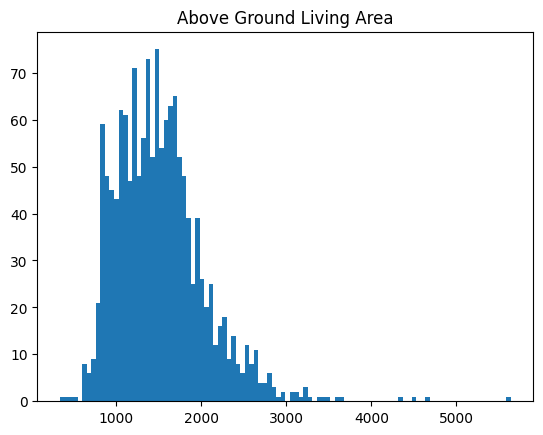

In [8]:
plt.hist(df_clean['GrLivArea'],bins=100)
plt.title('Above Ground Living Area')
plt.show()

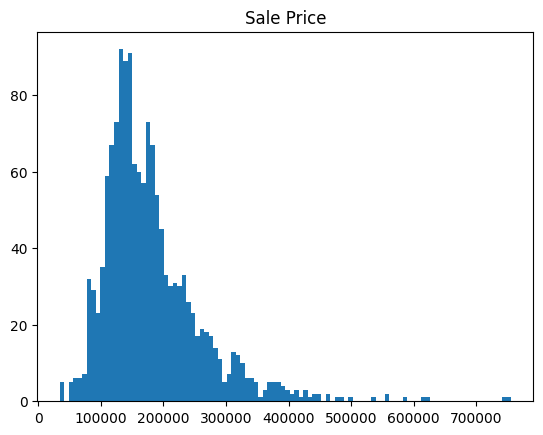

In [9]:
plt.hist(df_clean['SalePrice'],bins=100)
plt.title('Sale Price')
plt.show()

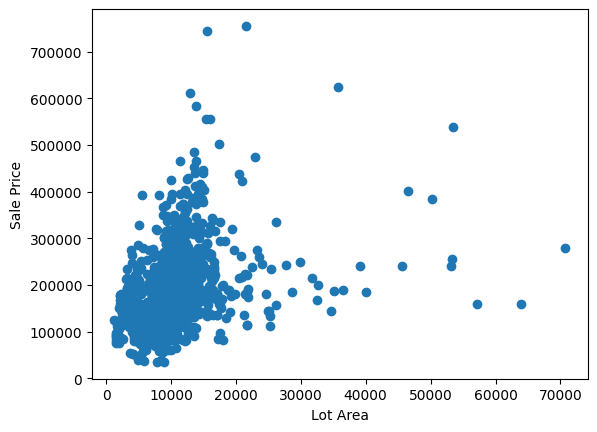

In [10]:
plt.scatter(df_clean['LotArea'],df_clean['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

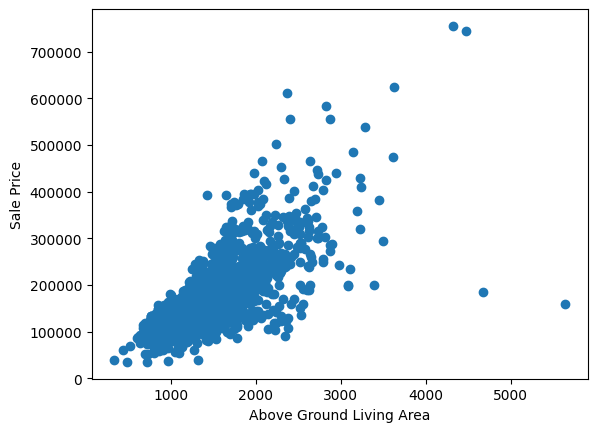

In [11]:
plt.scatter(df_clean['GrLivArea'],df_clean['SalePrice'])
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')
plt.show()

The living area displays higher positive correlation with the sale price compared to lot area

In [13]:
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
correlation = df_clean[num_cols].corr()
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.792761
GrLivArea        0.708338
GarageCars       0.641490
GarageArea       0.624592
TotalBsmtSF      0.611049
1stFlrSF         0.603334
FullBath         0.559955
TotRmsAbvGrd     0.535008
YearBuilt        0.525587
YearRemodAdd     0.509796
GarageYrBlt      0.490518
MasVnrArea       0.478334
Fireplaces       0.462937
BsmtFinSF1       0.383087
LotArea          0.354494
LotFrontage      0.347763
WoodDeckSF       0.326204
2ndFlrSF         0.322351
OpenPorchSF      0.317946
HalfBath         0.288366
BsmtFullBath     0.222616
BsmtUnfSF        0.217719
BedroomAbvGr     0.168593
ScreenPorch      0.112924
PoolArea         0.093001
MoSold           0.046766
3SsnPorch        0.045204
Id              -0.018950
BsmtFinSF2      -0.019361
BsmtHalfBath    -0.019544
MiscVal         -0.022366
LowQualFinSF    -0.025217
YrSold          -0.029440
OverallCond     -0.078005
MSSubClass      -0.083704
EnclosedPorch   -0.127618
KitchenAbvGr    -0.135548
Name: SalePr

In [19]:
reg = linear_model.LinearRegression()
X = df_clean[['GrLivArea', 'TotalBsmtSF']]
y = df_clean['SalePrice']
reg.fit(X,y)
print(f"The coefficients are {reg.coef_}")
print(f"The intercept is {reg.intercept_}")
print(f"The R^2 is {reg.score(X,y)}")
print(f"The prediction for a house with 2000 sqft above ground and 1000 sqft basement is {reg.predict([[2000,1000]])}")

The coefficients are [81.87075811 66.05380454]
The intercept is -13103.393861199176
The R^2 is 0.6074659222722638
The prediction for a house with 2000 sqft above ground and 1000 sqft basement is [216691.92689817]


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1124.
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          8.95e-296
Time:                        18:56:04   Log-Likelihood:                -17809.
No. Observations:                1456   AIC:                         3.562e+04
Df Residuals:                    1453   BIC:                         3.564e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.31e+04   4288.790     -3.055      